***TRAINING ATTEMPT 1***


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Hari/Evaluation/Classification/')
print(os.getcwd())
print(os.listdir())
sys.path.append(os.path.abspath("src"))

/content/drive/MyDrive/Hari/Evaluation/Classification
['notebooks', 'src', 'results', 'dataset']


In [ ]:
data_dir = "dir/Classification/dataset"
from data_ import get_dataloaders
from model import ResNet20
from train import train_model

In [ ]:
from data_ import get_dataloaders

# Paths to NPZ files
train_npz = "dir/Classification/dataset/train_data.npz"
val_npz = "dir/Classification/dataset/val_data.npz"

# Getting DataLoaders
dataloaders = get_dataloaders(train_npz, val_npz)

#train, val, and test loaders
train_loader = dataloaders["train"]
val_loader = dataloaders["val"]
test_loader = dataloaders["test"]

# Check batch
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)  # Expected: (200, 1, 150, 150), (200,)



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([200, 1, 150, 150]) torch.Size([200])


In [ ]:
# # Time execution
# start_time = time.time()
# train_loader, val_loader, test_loader = get_dataloaders(data_dir)
# end_time = time.time()

#print(f"DataLoader initialization time: {end_time - start_time:.3f} sec")

In [ ]:
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet20().to(device)
end_time = time.time()
print(f"Model loaded! Time taken: {end_time - start_time:.2f} sec")

Model loaded! Time taken: 0.28 sec


In [ ]:
epochs = 20 # as in the paper
learning_rate = 0.01 #to start, scheduler will take care later

In [ ]:
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)


Training started!
Epoch 1 started
Processing batch 1
Loss computed for batch 1
Batch 1 updated!
Processing batch 2
Loss computed for batch 2
Batch 2 updated!
Processing batch 3
Loss computed for batch 3
Batch 3 updated!
Processing batch 4
Loss computed for batch 4
Batch 4 updated!
Processing batch 5
Loss computed for batch 5
Batch 5 updated!
Processing batch 6
Loss computed for batch 6
Batch 6 updated!
Processing batch 7
Loss computed for batch 7
Batch 7 updated!
Processing batch 8
Loss computed for batch 8
Batch 8 updated!
Processing batch 9
Loss computed for batch 9
Batch 9 updated!
Processing batch 10
Loss computed for batch 10
Batch 10 updated!
Processing batch 11
Loss computed for batch 11
Batch 11 updated!
Processing batch 12
Loss computed for batch 12
Batch 12 updated!
Processing batch 13
Loss computed for batch 13
Batch 13 updated!
Processing batch 14
Loss computed for batch 14
Batch 14 updated!
Processing batch 15
Loss computed for batch 15
Batch 15 updated!
Processing batch 1

KeyboardInterrupt: 

Extremely bad performance , nearly random guesses , lowering learning rate

In [ ]:
epochs = 20 # as in the paper
learning_rate = 0.0001 #to start, scheduler will take care later
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)

Streaming output truncated to the last 5000 lines.
Processing batch 146
Loss computed for batch 146
Batch 146 updated!
Processing batch 147
Loss computed for batch 147
Batch 147 updated!
Processing batch 148
Loss computed for batch 148
Batch 148 updated!
Processing batch 149
Loss computed for batch 149
Batch 149 updated!
Processing batch 150
Loss computed for batch 150
Batch 150 updated!
[Epoch 9/20] Train Loss: 0.915237 | Train Acc: 0.553 | Val Loss: 0.911729 | Val Acc: 0.553
Epoch 9 completed!
Epoch 10 started
Processing batch 1
Loss computed for batch 1
Batch 1 updated!
Processing batch 2
Loss computed for batch 2
Batch 2 updated!
Processing batch 3
Loss computed for batch 3
Batch 3 updated!
Processing batch 4
Loss computed for batch 4
Batch 4 updated!
Processing batch 5
Loss computed for batch 5
Batch 5 updated!
Processing batch 6
Loss computed for batch 6
Batch 6 updated!
Processing batch 7
Loss computed for batch 7
Batch 7 updated!
Processing batch 8
Loss computed for batch 8
Bat

Lost Loss and Acc list vars due to reconnection of runtime. Retreieved the same for last 10 epochs from print statements

In [ ]:
train_losses = [0.915237, 0.868893, 0.824273, 0.788611, 0.753643, 0.726678, 0.709976, 0.692560, 0.683236, 0.676814, 0.673058, 0.672792]
train_accs = [0.553, 0.590, 0.629, 0.656, 0.688, 0.713, 0.727, 0.740, 0.752, 0.754, 0.757, 0.758]

val_losses = [0.911729, 0.907206, 0.806870, 0.762002, 0.723463, 0.713331, 0.788020, 0.673273, 0.674889, 0.683169, 0.658497, 0.666888]
val_accs = [0.553, 0.571, 0.646, 0.671, 0.697, 0.714, 0.673, 0.740, 0.763, 0.753, 0.766, 0.764]


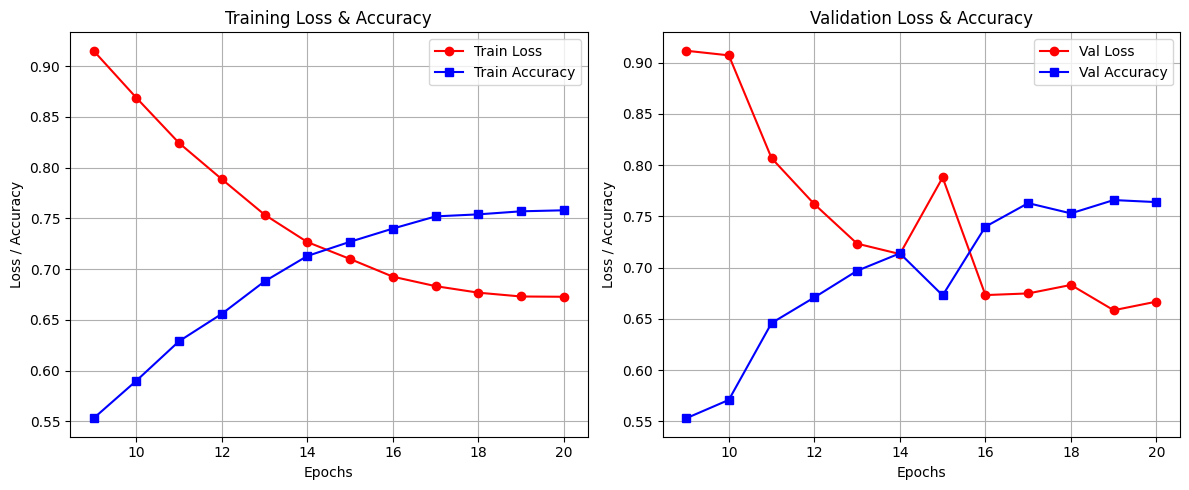

In [ ]:
epochs_ = list(range(9, 21))
# Plot Train Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_, train_losses, label="Train Loss", marker="o", color="red")
plt.plot(epochs_, train_accs, label="Train Accuracy", marker="s", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Training Loss & Accuracy")
plt.legend()
plt.grid(True)

# Plot Validation Loss & Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_, val_losses, label="Val Loss", marker="o", color="red")
plt.plot(epochs_, val_accs, label="Val Accuracy", marker="s", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Validation Loss & Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

This was the result after having the following metrics:
1. We used a lr scheduler.
2. Data augmentation was applied to train data
        (namely
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(20))
3. We did not apply any Normalization on top of the already existing min-max normalization
4. 20 layered ResNet was used.
5. L2 Regularization was used, by adding a weight decay to training process.
6. Loss  Criterion used was Cross Entropy Loss
7. Adam Optimizer was used for quick and easy optimization process.
8. Batch size was set to 200, so for a total of 30000 training images we had 150 batch runs per epoch.
9. On a T4 GPU run in colab , each epoch took nearly 2 mins on avg and hence 20 epochs took nearly 40 mins.
10. Model was save to src/results with all weights after each epoch.
11. Before Train and Val, a small test set was extracted and set aside(20% val set) from the Val set for final testing and ROC curve (Receiver Operating Characteristic curve) and AUC score (Area Under the ROC Curve) evaluation metrics. They will be applied now on the model saved after 20th epoch.

In [ ]:
model.load_state_dict(torch.load('./results/model_epoch_20.pth')) #Renamed this model weights file to Train_1.pth which can be found at './results/Train_1.pth'
model.to(device)
model.eval()

ResNet(
  (conv0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): Sequential(
    (0): BasicConvBlock(
      (features): Sequential(
        (conv_1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_1): ReLU()
        (conv_2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicConvBlock(
      (features): Sequential(
        (conv_1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_1): ReLU()
        (c

In [ ]:
import torch
import torch.nn.functional as F

def evaluate(model, dataloader, device):
    """ To run inference on the test dataset and compute accuracy & apply ROC ,AUC evaluation metrics. """
    model.eval()  # Set model to eval mode
    total_loss, correct = 0, 0
    total_samples = 0

    with torch.no_grad():  # No gradients needed during inference
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)

            # Compute predictions
            preds = outputs.argmax(dim=1)  # Get class with highest probability
            correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
            total_loss += loss.item() * images.size(0)

    # Compute final metrics
    avg_loss = total_loss / total_samples
    accuracy = correct / total_samples
    return avg_loss, accuracy


In [ ]:
test_loss, test_acc = evaluate(model, test_loader, device)

In [ ]:
print(test_acc)

0.7453333333333333


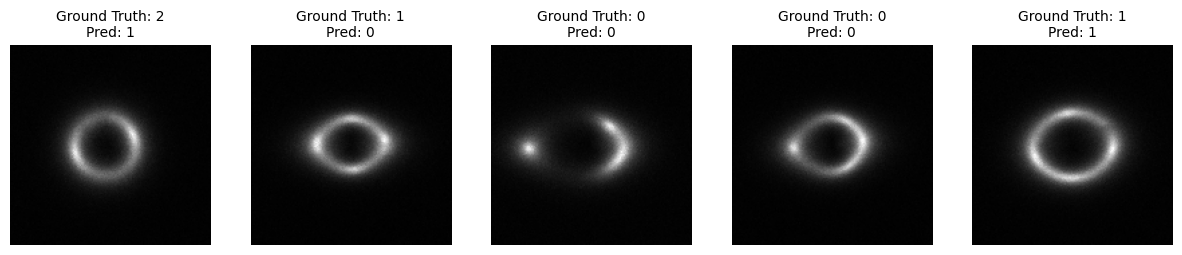

In [ ]:
def visualize_predictions(model, dataloader, device, num_images=10):
    """ Display a few test images with ground truth and model predictions. """
    model.eval()
    images, labels = next(iter(dataloader))  # Get a batch of test images
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)  # Get predicted labels

    # Convert to CPU for visualization
    images = images.cpu().squeeze(1).numpy()  # Remove channel dim
    labels = labels.cpu().numpy()
    preds = preds.cpu().numpy()

    # Select first `num_images`
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap="gray")  #grayscale images
        axes[i].set_title(f"Ground Truth: {labels[i]}\nPred: {preds[i]}", fontsize=10)
        axes[i].axis("off")

    plt.show()

# Visualize  a few predictions
visualize_predictions(model, test_loader, device, num_images=5)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


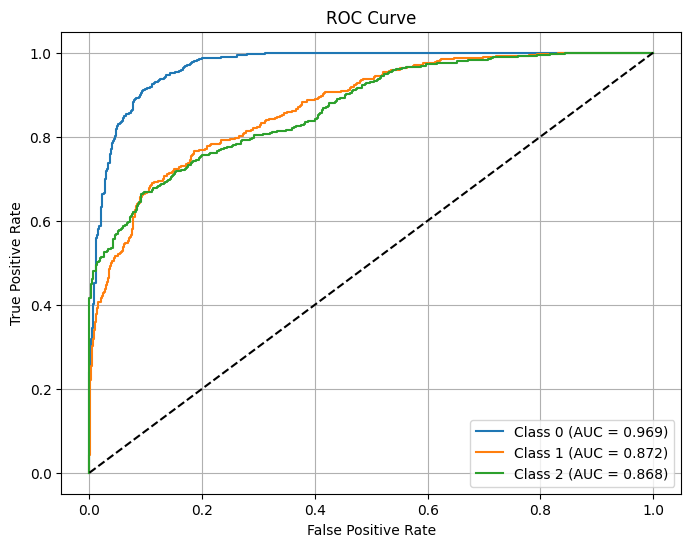

In [ ]:
#ROC and AUC analysis using sklearn :
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_auc_score

def compute_roc_auc(model, dataloader, device, num_classes=3):
    """Computes ROC curves and AUC scores for each individual class."""
    model.eval()

    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.cpu().numpy()  # Convert labels to NumPy
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities

            all_labels.extend(labels)
            all_probs.extend(probs)

    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Binarize labels for multi-class ROC
    all_labels_bin = label_binarize(all_labels, classes=np.arange(num_classes))

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    return fpr, tpr, roc_auc

def plot_roc_curves(fpr, tpr, roc_auc, num_classes=3):
    """Plots ROC curves for each class."""
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line (random classifier)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

#Compute ROC & AUC
fpr, tpr, roc_auc = compute_roc_auc(model, test_loader, device)

# Plot ROC Curves
plot_roc_curves(fpr, tpr, roc_auc)

As seen is the image visualization, class 0 prediction was almost spot on and the same is revealed by the ROC for it, with an AUC score of nearly 0.969, the model acts as a nearly perfect classifier for the class 0 atleast.

For the next traing spell I will implement the following:
1. Increase the depth of the model to 32 layers (6*5 + 2).
2. Implement a lr scheduler which reduces lr on the basis of how Val loss is changing.
3. Z Score Normalization using 0 mean and unit variance on the entire dataset.

The ROC for classes 1 and 2 are not well separated , indicating that there are far more features to be learnt there, I am increasing the model depth for the same. If this does not help, in the next training attempt I will change the loss criteria to a weighted cross entropy loss, this will give more weight to wrong classification of classes 1 and 2.